In [18]:
#使用sympy库求解一元二次方程组
import sympy as sy
x=sy.Symbol("x")
exp=x**2+3*x-4
sy.solve(exp)
# e=sy.Eq(x**2+3*x-4,0)
# sy.solve(e,x)

[-4, 1]

一元二次方程组的通解为： [(-b - sqrt(-4*a*c + b**2))/(2*a), (-b + sqrt(-4*a*c + b**2))/(2*a)]
一元二次方程组解简化为： [(-b - sqrt(-4*a*c + b**2))/(2*a), (-b + sqrt(-4*a*c + b**2))/(2*a)]
exp对x求导结果为： 2*a*x + b
exp在-10到10范围内积分结果为： 2000*a/3 + 20*c
exp的不定积分为： a*x**3/3 + b*x**2/2 + c*x


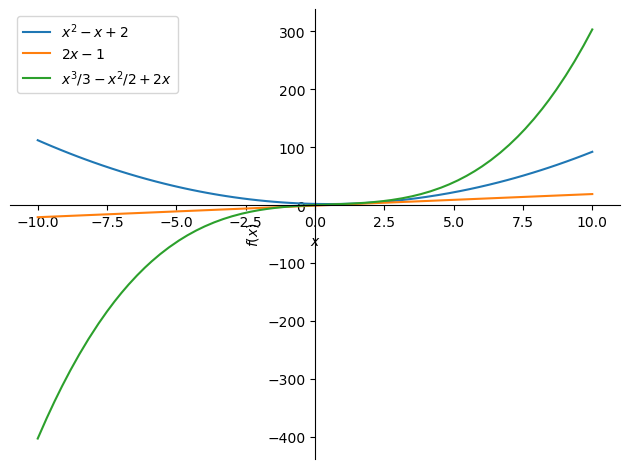

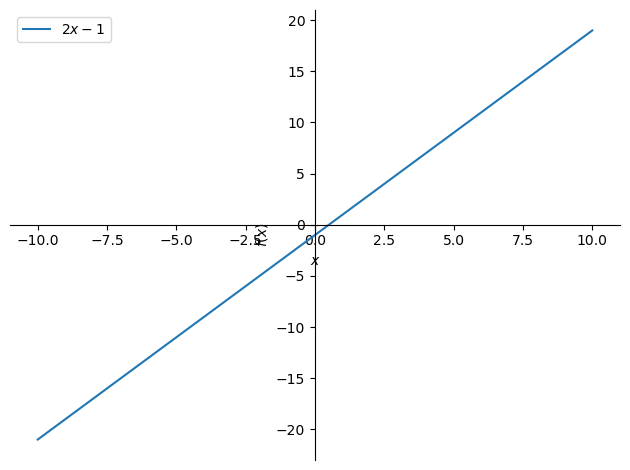

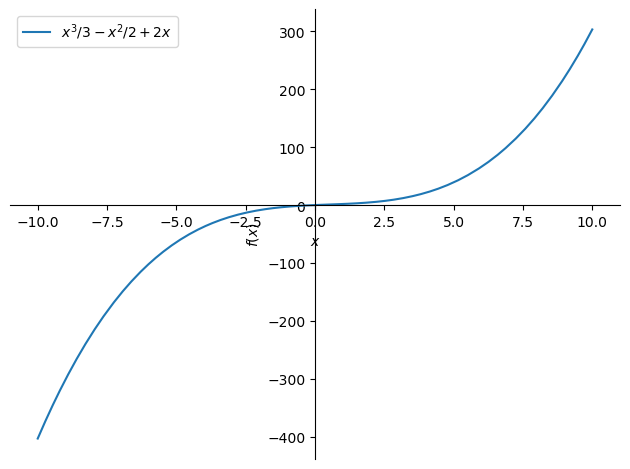

In [86]:
#使用sympy求解一般形式的一元二次方程组并求导数与积分
import sympy as sy
x,a,b,c=sy.symbols("x,a,b,c")
equation=sy.Eq(a*x**2+b*x+c,0)
print("一元二次方程组的通解为：",sy.solve(equation,x))
print("一元二次方程组解简化为：",[i.simplify() for i in sy.solve(equation,x)])
exp=a*x**2+b*x+c
diff=sy.diff(exp,x)
inte=sy.integrate(exp,(x,-10,10))
print("exp对x求导结果为：",diff)
print("exp在-10到10范围内积分结果为：",inte)
inte=sy.integrate(exp,x)
print("exp的不定积分为：",inte)
# 定义具体的参数值并进行替换
equation1 = exp.subs({a:1, b: -1, c: 2})
# 计算导数和积分
diff1 = sy.diff(equation1, x)
inte1 = sy.integrate(equation1, x)
# 绘制图形
sy.plotting.plot(equation1,diff1,inte1,(x,-10,10),show=True,legend=True)
sy.plot(diff1,(x,-10,10),legend=True)
sy.plot(inte1,(x,-10,10),legend=True)

In [46]:
#使用scipy的优化模块寻找全局最小值
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
def f(x):
    return x**4-4*x**3+x**2+6*x+2
#方法一：使用minimize_scalar优化单变量函数寻找全局最小值
res=minimize_scalar(f,bounds=(-5,5))
min_x=res.x
min_y=res.fun
print(min_x,min_y)
#方法二：使用minimize优化多变量函数优化单变量寻找全局最小值
res=minimize(f,x0=-5,bounds=((-5,5),))#x0参数是初始猜测值，bounds是一个元组或者列表表示多个变量的取值范围，注意不要漏掉最后的逗号
min_x=res.x
min_y=res.fun
print(min_x,min_y)

-0.5811373854379757 -0.24999999997912958
[2.58113887] -0.2499999999999858


In [49]:
#Pandas创建一个包含姓名和年龄的DataFrame，并添加一个新列“年龄分组”
import numpy as np
import pandas as pd
#创建包含姓名和年龄的DataFrame
df=pd.DataFrame([["朱士杭",19],["李志",46],["小朋友",4],["古稀老人",70],["Edison",13]],
                index=range(5),columns=["姓名","年龄"])
print("创建的DataFrame为：",df)
#添加一个新列“年龄分组”
df["年龄分组"]="未知"#这里不用insert方法，直接使用[]创建新的列名
df.loc[df["年龄"]<12,"年龄分组"]="儿童"
df.loc[(df["年龄"]<18) & (df["年龄"]>=12),"年龄分组"]="青少年"
df.loc[df["年龄"]>=18,"年龄分组"]="成人"
print(df)

创建的DataFrame为：        姓名  年龄
0     朱士杭  19
1      李志  46
2     小朋友   4
3    古稀老人  70
4  Edison  13
       姓名  年龄 年龄分组
0     朱士杭  19   成人
1      李志  46   成人
2     小朋友   4   儿童
3    古稀老人  70   成人
4  Edison  13  青少年


In [50]:
#有两个DataFrame，一个包含客户信息，另一个包含订单信息。编写代码将这两个DataFrame按照客户ID合并。
import numpy as np
import pandas as pd
# cli_info=pd.DataFrame([],columns=["客户ID","客户姓名"])
data={"客户姓名":["朱士杭","李志"],"客户ID":["231300027","1701"]}
# cli_info.loc[0]=[231300027,"朱士杭"]
# cli_info.loc[1]=[1701,"李志"]
cli_info=pd.DataFrame(data)
print("客户信息为：\n",cli_info)
data={"客户ID":["231300027","1701"],"订单编码":[340223,230243],"订单商品":["我爱南京CD","HUAWEI Mate60"]}
bill_info=pd.DataFrame(data)
print("订单信息为：\n",bill_info)
merge_info=pd.merge(cli_info,bill_info,on="客户ID")
print("合并后DataFrame信息为：\n",merge_info)

客户信息为：
   客户姓名       客户ID
0  朱士杭  231300027
1   李志       1701
订单信息为：
         客户ID    订单编码           订单商品
0  231300027  340223         我爱南京CD
1       1701  230243  HUAWEI Mate60
合并后DataFrame信息为：
   客户姓名       客户ID    订单编码           订单商品
0  朱士杭  231300027  340223         我爱南京CD
1   李志       1701  230243  HUAWEI Mate60


In [51]:
#银行客户流失数据集用于预测银行业的客户流失，其中包含离开银行或继续作为客户的银行客户的信息
import numpy as np
import pandas as pd
bank=pd.read_csv("bank.csv")
data=bank[["CreditScore","Balance"]]
# data=bank.loc[:,["CreditScore","Balance"]]
print(data)
#算出来的均值与方差仍然为一个DataFrame数据
m=data.mean()
v=data.var()
print("数据的均值为：\n",m)
print("数据的方差为：\n",v)

      CreditScore    Balance
0             619       0.00
1             608   83807.86
2             502  159660.80
3             699       0.00
4             850  125510.82
...           ...        ...
8995          573       0.00
8996          615  138521.83
8997          710       0.00
8998          674   83727.68
8999          702       0.00

[9000 rows x 2 columns]
数据的均值为： CreditScore      650.133556
Balance        76426.958967
dtype: float64
数据的方差为： CreditScore    9.372752e+03
Balance        3.900204e+09
dtype: float64


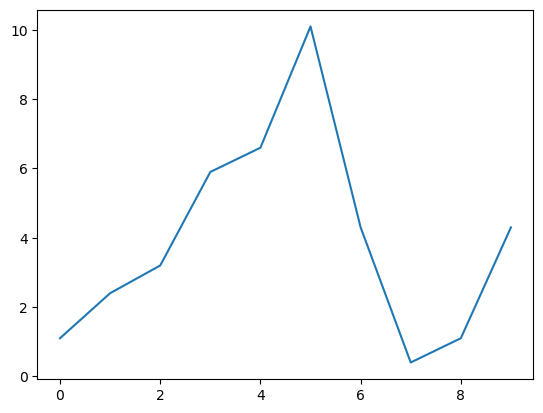

In [55]:
# 创建一个简单的折线图，显示该股票价格随时间的变化
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=[1.1, 2.4, 3.2, 5.9, 6.6, 10.1, 4.3, 0.4, 1.1, 4.3]
data=np.array(data,dtype=np.float32)
plt.plot(data)
plt.show()

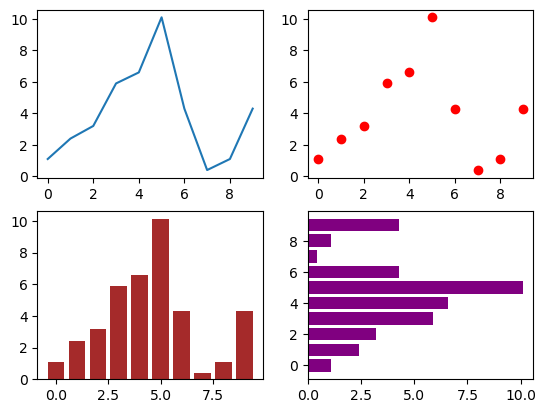

In [57]:
#使用add_subplot功能，在一个画布上绘制上一题中股票价格走向的四个不同的图表（分别为折线图、散点图、竖向柱状图、横向柱状图）
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=[1.1, 2.4, 3.2, 5.9, 6.6, 10.1, 4.3, 0.4, 1.1, 4.3]
data=np.array(data,dtype=np.float32)
figure=plt.figure()
#先画第一个图表为折线图
figure.add_subplot(2,2,1)
plt.plot(list(range(len(data))),data)
#再画第二个图表为散点图
figure.add_subplot(2,2,2)
# plt.plot(list(range(len(data))),data,"ro")#第一种方法是使用plt的参数"ro"表示red以及散点
plt.scatter(list(range(len(data))),data,color="red")#第二种方法是使用scatter函数，第一个传x，第二个传y
#再画第三个图表为柱状图
figure.add_subplot(2,2,3)
plt.bar(list(range(len(data))),data,color="brown")
#最画第四个图表为横向柱状图
figure.add_subplot(2,2,4)
plt.barh(list(range(len(data))),data,color="purple")
#最后使用show()函数将其显示出来
plt.show()

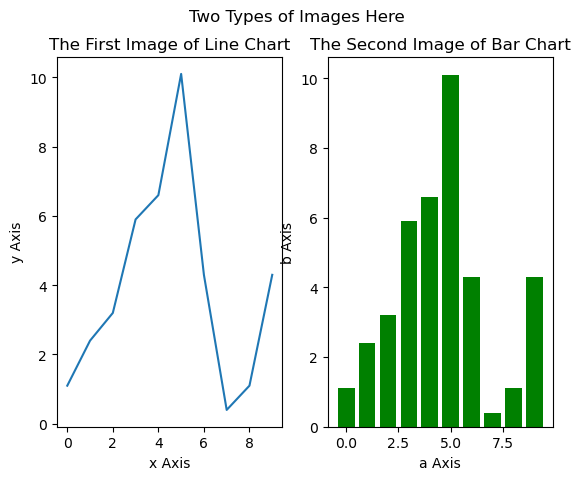

In [59]:
#使用subplot功能，在一个画布上绘制上一题中股票价格走向的两个不同的图表，例如一个折线图和一个柱状图
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=[1.1, 2.4, 3.2, 5.9, 6.6, 10.1, 4.3, 0.4, 1.1, 4.3]
data=np.array(data,dtype=np.float32)
#先画第一个图表为折线图
plt.subplot(1,2,1)
plt.plot(data)
plt.title("The First Image of Line Chart")
plt.xlabel('x Axis')
plt.ylabel('y Axis')
#再画第二个图表为散点图
plt.subplot(1,2,2)
plt.bar(list(range(len(data))),data,color="green")
plt.title("The Second Image of Bar Chart")
plt.xlabel('a Axis')
plt.ylabel('b Axis')
#设置整体的title
plt.suptitle("Two Types of Images Here")
#最后使用show()函数将其显示出来
plt.show()